In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import requests
import json

In [2]:
apikey = "b399f5a7a24bf7be63e60ce7c22d1cb6e294e92b"

In [3]:
url = 'https://api.census.gov/data/2013/acs1?get=NAME,B02008_001E,B02009_001E,B02010_001E,B02011_001E,B02012_001E,B02013_001E&for=congressional%20district:*&key=' + apikey

In [4]:
ethnicitydata = requests.get(url)
edata = ethnicitydata.json()
ethnicity =pd.DataFrame(edata)
ethnicity.columns = ethnicity.iloc[0]

In [5]:
# ["B02008_001E":"White", "B02009_001E":"African American","B02010_001E":"Native American/Alaskan","B02011_001E":"Asian","B02012_001E":"Native Hawaiian/Pacific Islander","B02013_001E":"Other"]

In [6]:
e1 = ethnicity.drop([0])
e2 = e1[(e1["NAME"] == "Congressional District 45 (113th Congress), California")]
e2.head()

,NAME,B02008_001E,B02009_001E,B02010_001E,B02011_001E,B02012_001E,B02013_001E,state,congressional district
66,"Congressional District 45 (113th Congress), Ca...",498130,20351,7528,182367,3683,53331,06,45


In [7]:
e2 = e2.rename(columns={"B02008_001E":"White", "B02009_001E":"African American","B02010_001E":"Native American/Alaskan","B02011_001E":"Asian","B02012_001E":"Native Hawaiian/Pacific Islander","B02013_001E":"Other"})
e2.head()

,NAME,White,African American,Native American/Alaskan,Asian,Native Hawaiian/Pacific Islander,Other,state,congressional district
66,"Congressional District 45 (113th Congress), Ca...",498130,20351,7528,182367,3683,53331,06,45


In [8]:
e3 = e2.T
e4 = e3.drop(["NAME"])
e4

,66
0,
White,498130
African American,20351
Native American/Alaskan,7528
Asian,182367
Native Hawaiian/Pacific Islander,3683
Other,53331
state,06
congressional district,45


In [9]:
e5 = e4.drop(["state"])
e5.columns = e5.columns.astype(str)
e5 = e5.rename(columns={"66":"Ethnicity"})
e5

,Ethnicity
0,
White,498130
African American,20351
Native American/Alaskan,7528
Asian,182367
Native Hawaiian/Pacific Islander,3683
Other,53331
congressional district,45


In [10]:
e6 = e5.drop(["congressional district"])
e6["Ethnicity"]= e6["Ethnicity"].astype(str).astype(int)
e6.dtypes

Ethnicity    int32
dtype: object

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000028C0321CC88>],
      dtype=object)

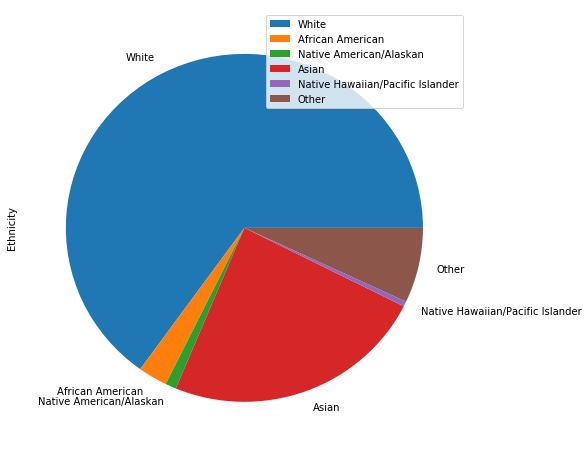

In [14]:
e6.plot.pie(subplots=True, figsize=(8,8))